In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import fbprophet

In [5]:
from fbprophet import Prophet

STEP 1: READING THE FILE

In [7]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/TradeInventories.csv")

In [20]:
df.head()

,ds,y
0,1997-01-01,1301161
1,1997-02-01,1307080
2,1997-03-01,1303978
3,1997-04-01,1319740
4,1997-05-01,1327294


<AxesSubplot:xlabel='ds'>

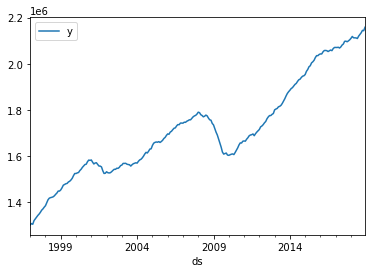

In [18]:
df.plot(x = "ds", y= "y")

STEP 2: MODIFYING THE DATAFRAME SO AS TO MODEL IN PROPHET

In [11]:
df.rename(columns= {"Date": "ds", "Inventories": "y"}, inplace= True)

In [12]:
df["ds"] = pd.to_datetime(df["ds"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      264 non-null    datetime64[ns]
 1   y       264 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


Step 3: Train test split

In [14]:
df.shape

(264, 2)

In [24]:
train = df[:252]
test = df[252:]

In [81]:
train.head()

,ds,y
0,1997-01-01,1301161
1,1997-02-01,1307080
2,1997-03-01,1303978
3,1997-04-01,1319740
4,1997-05-01,1327294


In [27]:
test.head()

,ds,y
252,2018-01-01,2110158
253,2018-02-01,2118199
254,2018-03-01,2112427
255,2018-04-01,2112276
256,2018-05-01,2111835


Step 4: Creating the prophet model

In [28]:
model = Prophet()

In [29]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


STEP 5: CREATING DATAFRAME FOR FUTURE FORECASTS

In [30]:
df_future = model.make_future_dataframe(periods= 12, freq= "MS")

STEP 6: MAKE PREDICTIONS IN THE TEST RANGE

In [41]:
pred = model.predict(df_future)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-01,1.302484e+06,1.290421e+06,1.321059e+06,1.302484e+06,1.302484e+06,3289.394303,3289.394303,3289.394303,3289.394303,3289.394303,3289.394303,0.0,0.0,0.0,1.305774e+06
1,1997-02-01,1.309422e+06,1.296039e+06,1.327806e+06,1.309422e+06,1.309422e+06,2423.341735,2423.341735,2423.341735,2423.341735,2423.341735,2423.341735,0.0,0.0,0.0,1.311845e+06
2,1997-03-01,1.315688e+06,1.301917e+06,1.332417e+06,1.315688e+06,1.315688e+06,920.899263,920.899263,920.899263,920.899263,920.899263,920.899263,0.0,0.0,0.0,1.316609e+06
3,1997-04-01,1.322626e+06,1.308713e+06,1.339017e+06,1.322626e+06,1.322626e+06,1026.672886,1026.672886,1026.672886,1026.672886,1026.672886,1026.672886,0.0,0.0,0.0,1.323653e+06
4,1997-05-01,1.329340e+06,1.314348e+06,1.344232e+06,1.329340e+06,1.329340e+06,-290.449734,-290.449734,-290.449734,-290.449734,-290.449734,-290.449734,0.0,0.0,0.0,1.329049e+06


Plotting entire ts

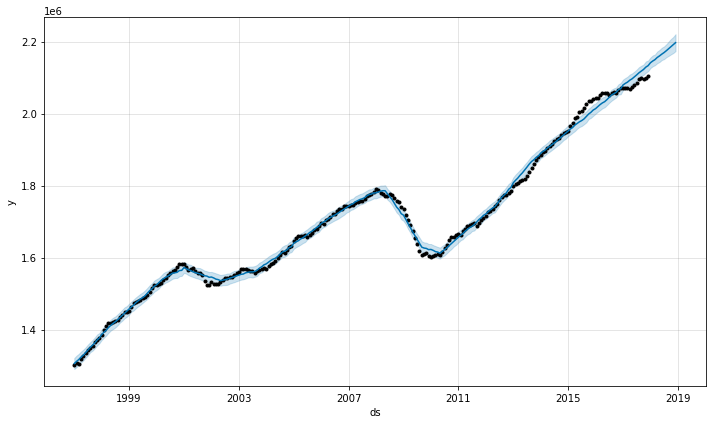

In [106]:
model.plot(pred);

Plotting components

In [108]:
from fbprophet.plot import plot_components

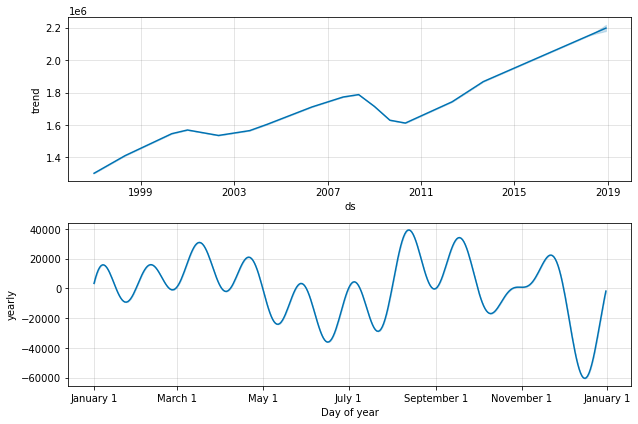

In [110]:
model.plot_components(pred);

Plotting future predictions

<AxesSubplot:xlabel='ds'>

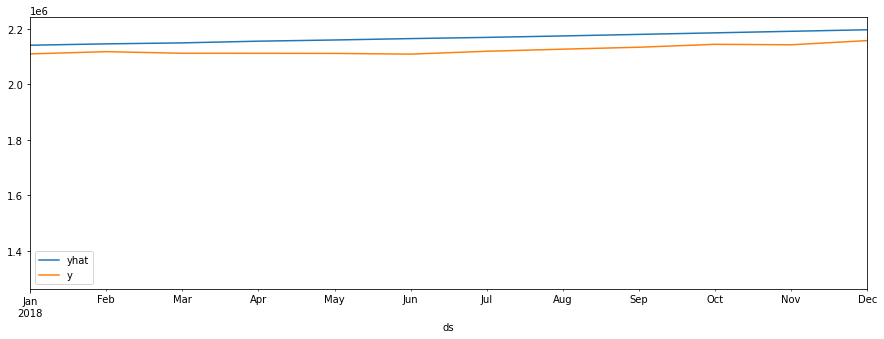

In [105]:
ax = pred.plot(x="ds" ,y= "yhat",legend = True, figsize = (15, 5))
test.plot(x = "ds", y = "y", legend = True, ax = ax, xlim = (pd.to_datetime("2018-01-01"), pd.to_datetime("2018-12-01")))

Step 7: Model evaluation

In [60]:
from statsmodels.tools.eval_measures import rmse

In [64]:
rmse(test["y"], pred[-12:]["yhat"])

43949.91540181162

In [65]:
test.mean()

y    2.125076e+06
dtype: float64

Step 8: CROSS VALIDATION

Cross Validation IN Prophet allows us to continuosly evaluate our model through the time series over a specific period. 

In [66]:
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

In [95]:
initial = 365*4
initial = str(initial) + " days"

In [96]:
period = 365*2
period = str(period) + " days"

In [97]:
horizon = 365
horizon = str(horizon) + " days"

In [98]:
df_cv = cross_validation(model, initial = initial, period = period, horizon = horizon)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2002-12-05 00:00:00 and 2016-12-01 00:00:00
100%|██████████| 8/8 [00:38<00:00,  4.76s/it]


In [99]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-01-01,1.541187e+06,1.534600e+06,1.547702e+06,1560578,2002-12-05
1,2003-02-01,1.541233e+06,1.534252e+06,1.547606e+06,1567829,2002-12-05
2,2003-03-01,1.545379e+06,1.537872e+06,1.552085e+06,1567763,2002-12-05
3,2003-04-01,1.546670e+06,1.539152e+06,1.554495e+06,1568316,2002-12-05
4,2003-05-01,1.547894e+06,1.539185e+06,1.556400e+06,1564403,2002-12-05


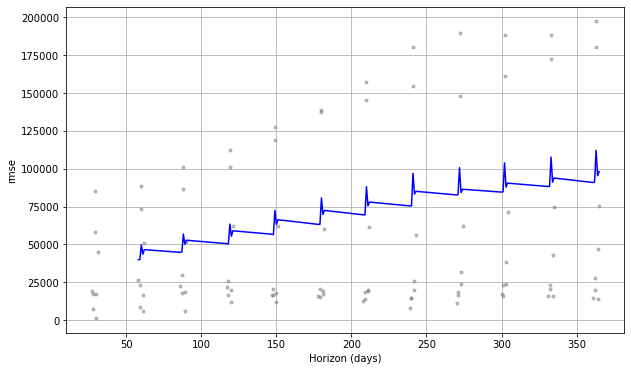

In [101]:
plot_cross_validation_metric(df_cv, metric= "rmse");

Plotting trend change points

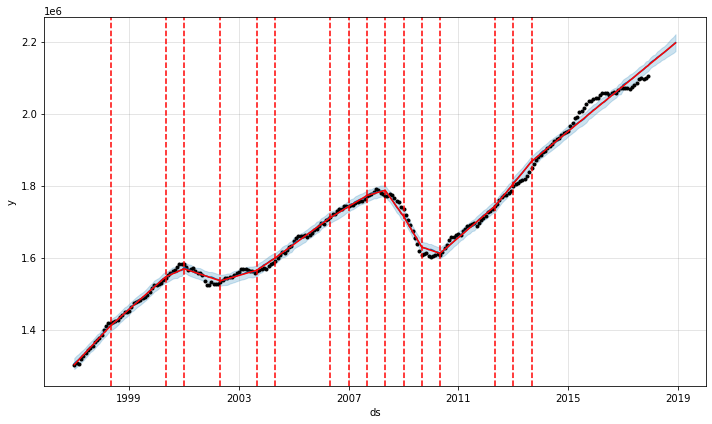

In [107]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(pred)
a = add_changepoints_to_plot(fig.gca(), model, pred)